In [1]:
import numpy as np 
import pandas as pd

In [2]:
data = pd.read_csv("cuisine_dataset.csv")

In [3]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [9]:
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')  # Convert 'Votes' to numeric, handling errors

# Identify the restaurant with the highest number of votes
highest_votes_restaurant = data.loc[data['Votes'].idxmax()]

# Display the results
print("Restaurant with the Highest Votes:")
print(highest_votes_restaurant[['Restaurant ID', 'Restaurant Name', 'Votes']])


Restaurant with the Highest Votes:
Restaurant ID      51705
Restaurant Name     Toit
Votes              10934
Name: 728, dtype: object


In [8]:
# Identify the restaurant with the lowest number of votes
lowest_votes_restaurant = data.loc[data['Votes'].idxmin()]

print("\nRestaurant with the Lowest Votes:")
print(lowest_votes_restaurant[['Restaurant ID', 'Restaurant Name', 'Votes']])


Restaurant with the Lowest Votes:
Restaurant ID               6710645
Restaurant Name    Cantinho da Gula
Votes                             0
Name: 69, dtype: object


In [10]:
# Drop rows with missing values in 'Votes' or 'Aggregate rating'
data = data.dropna(subset=['Votes', 'Aggregate rating'])

# Calculate the correlation
correlation = data['Votes'].corr(data['Aggregate rating'])


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

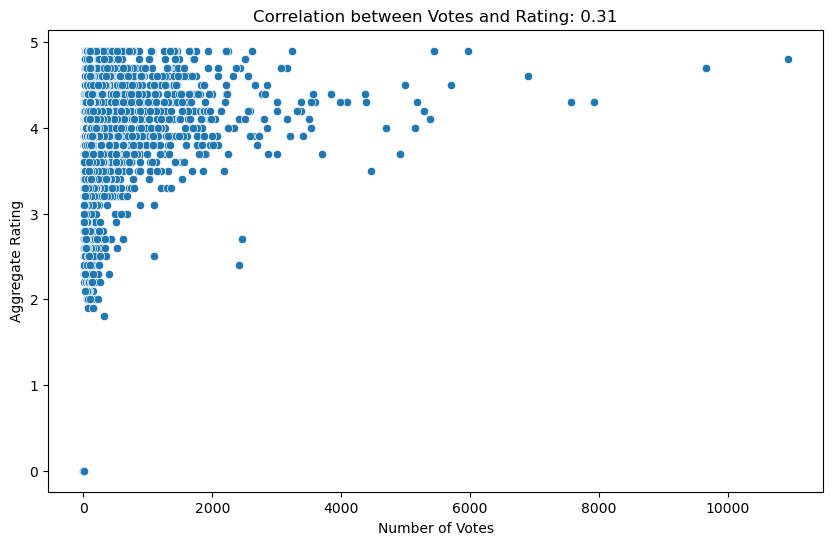

Correlation between Votes and Rating: 0.31


In [15]:
# Plot a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=data)
plt.title(f'Correlation between Votes and Rating: {correlation:.2f}')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.show()

print(f"Correlation between Votes and Rating: {correlation:.2f}")